In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [97]:
# Reading two csv files and combining them together
def read_data():

    df1=pd.read_csv('outputfile_1.csv')
    df2=pd.read_csv('outputfile_2.csv')
    df3=pd.read_csv('outputfile_3.csv')
    df4=pd.read_csv('outputfile_4.csv')

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])

    return df,df_park
df,df_park=read_data()

Mapping Access distance and egress distance into 5 bins each

In [69]:
def map_access_dis(ACCESS_DIS):
    if ACCESS_DIS in [1, 2]:
        return ACCESS_DIS
    elif ACCESS_DIS in [3,4]:
        return 3
    elif ACCESS_DIS in [5,6,7,8]:
        return 4
    elif ACCESS_DIS in [9,10,11]:
        return 5

# Apply the mapping function to create the 'ACCESS_DIS_B' column
df['ACCESS_DIS_B'] = df['ACCESS_DIS'].apply(map_access_dis)



# convert all values of EGRESS_DIS into integers
df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

def map_egress_dis(EGRESS_DIS):
    if EGRESS_DIS in [1,2]:
        return int(EGRESS_DIS)
    if EGRESS_DIS in [3,4]:
        return 3
    if EGRESS_DIS in [5,6,7,8]:
        return 4
    if EGRESS_DIS in [9,10,11]:
        return 5
    elif EGRESS_DIS in [0]:
        return 2
    
    

# Apply the mapping function to create the 'EGRESS_DIS_B' column
df['EGRESS_DIS_B'] = df['EGRESS_DIS'].apply(map_egress_dis)


Mapping Access and egress distances into 3 bins each

In [70]:
def map_access_dis(ACCESS_DIS):
    if ACCESS_DIS in [1, 2]:
        return 1
    elif ACCESS_DIS in [3,4,5,6]:
        return 2
    elif ACCESS_DIS in [7,8,9,10,11]:
        return 3

# Apply the mapping function to create the 'ACCESS_DIS_B' column
df_park['ACCESS_DIS_B'] = df_park['ACCESS_DIS'].apply(map_access_dis)

def map_access_dis(ACCESS_DIS):
    if ACCESS_DIS in [1, 2]:
        return 1
    elif ACCESS_DIS in [3,4,5,6]:
        return 2
    elif ACCESS_DIS in [7,8,9,10,11]:
        return 3

# Apply the mapping function to create the 'ACCESS_DIS_B' column
df_park['ACCESS_DIS_B'] = df_park['ACCESS_DIS'].apply(map_access_dis)

In [71]:
#  convert all values of EGRESS_DIS into integers
df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

def map_egress_dis(EGRESS_DIS):
    if EGRESS_DIS in [1,2]:
        return 1
    if EGRESS_DIS in [3,4,5,6]:
        
        return 2
    if EGRESS_DIS in [7,8,9,10,11]:
        return 3
    elif EGRESS_DIS in [0]:
        return 1
    
    

# Apply the mapping function to create the 'EGRESS_DIS_B' column
df['EGRESS_DIS_B'] = df['EGRESS_DIS'].apply(map_egress_dis)


#  convert all values of EGRESS_DIS into integers
df_park["EGRESS_DIS"]=df_park["EGRESS_DIS"].astype(int)

def map_egress_dis(EGRESS_DIS):
    if EGRESS_DIS in [1,2]:
        return 1
    if EGRESS_DIS in [3,4,5,6]:
        
        return 2
    if EGRESS_DIS in [7,8,9,10,11]:
        return 3
    elif EGRESS_DIS in [0]:
        return 1
    
    

# Apply the mapping function to create the 'EGRESS_DIS_B' column
df_park['EGRESS_DIS_B'] = df_park['EGRESS_DIS'].apply(map_egress_dis)

Mapping Income levels into 6 groups. Income levels are available only for 1168 samples

In [100]:
# df,df_park=read_data()
income_mapper={'>2 Lakhs':6, 'nan':0, '25,001 – 50,000':3, '1,00,001 – 2,00,000':5,
       '10,001 – 25,000':2, '50,001 – 1,00,000':4, '<=10,000':1}
df['INCOME']=df.INCOME.map(income_mapper)

In [107]:
df,df_park=read_data()
df['INCOME'].value_counts()

25,001 – 50,000        323
50,001 – 1,00,000      303
>2 Lakhs               201
1,00,001 – 2,00,000    146
10,001 – 25,000        138
<=10,000                57
Name: INCOME, dtype: int64

In [110]:
fig=px.histogram(df,x='RENT_BICYCLE', color='MALE',histnorm='percent')
fig.update_layout(bargap=0.2)
fig.show()

Cross-tabulation of Access distacce and egress distance

ACCESS_DIS_B      1      2      3      4      5
EGRESS_DIS_B                                   
1             40.27  26.51  14.65  10.08   8.48
2             31.21  21.31  23.74  11.96  11.78
3             38.24  18.75  14.34  15.44  13.24
All           38.11  24.55  16.57  11.07   9.71


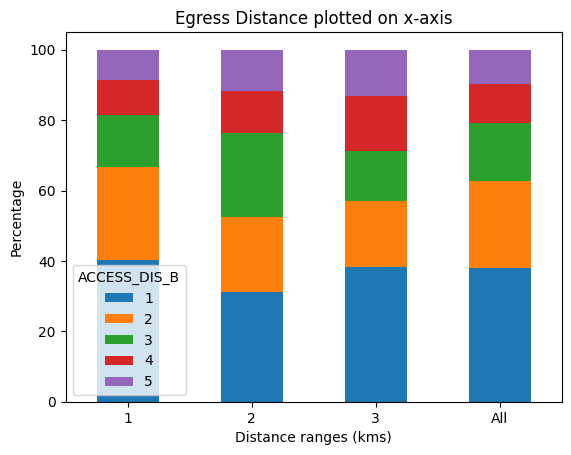

In [53]:
# df=df.loc[(df['RENT_BICYCLE']==1) | (df['RENT_BICYCLE']==2)]
crosstab=pd.crosstab(df["EGRESS_DIS_B"],df["ACCESS_DIS_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.title("Egress Distance plotted on x-axis")
# plt.xticks([0,1,2,3,4,5],['<0.5','0.5-1','1-2','2-4','>4 ','ALL'])
# plt.legend(['<0.5','0.5-1','1-2','2-4','>4'])
plt.xticks(rotation=0)
plt.show()

In [54]:
# Among people using it for either Access or Egress, if access distance is within 1 km then more of them are willing to use it for egress only for egress more than 1 km
df1=df.loc[(df['ACCESS_DIS_B']==1) | (df['EGRESS_DIS_B']!=1) ]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

<AxesSubplot: xlabel='RENT_BICYCLE', ylabel='Percent'>

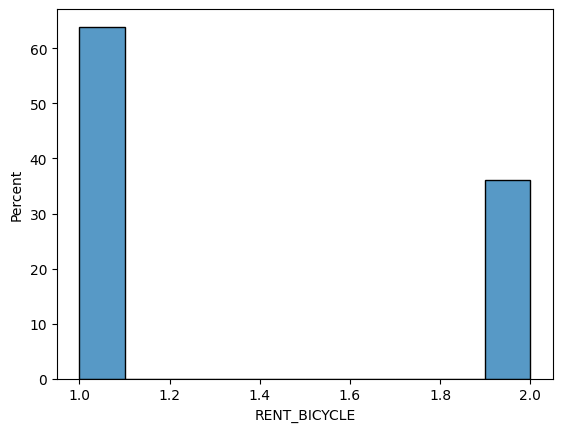

In [55]:
# Among people using it for either Access or Egress, if Egress distance is within 1 km then more of them are willing to use it for access only 
df2=df.loc[(df['EGRESS_DIS_B'] ==1) | (df['ACCESS_DIS_B']!=1)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
sns.histplot(data=df2,x='RENT_BICYCLE',stat='percent')

Binning Access and Egress times into 4 bins each

In [56]:
bins = [0, 5, 10, 20, 60]

# Define labels for the bins
labels = ['1-5', '6-10', '11-20', '21-60']

# Use pd.cut() to create the bins
df['ACCESS_TIME_B'] = pd.cut(df['ACCESS_TIME'], bins=bins, labels=labels)


# Define the bin ranges
bins = [0, 5, 10, 20, 60]

# Define labels for the bins
labels = ['1-5', '6-10', '11-20', '21-60']

# Use pd.cut() to create the bins
df['EGRESS_TIME_B'] = pd.cut(df['EGRESS_TIME'], bins=bins, labels=labels)

ACCESS_TIME_B    1-5   6-10  11-20  21-60
EGRESS_TIME_B                            
1-5            46.25  31.42  17.05   5.28
6-10           39.01  37.68  17.75   5.56
11-20          34.62  34.40  26.20   4.78
21-60          37.90  24.19  29.84   8.06
All            41.34  33.68  19.55   5.43


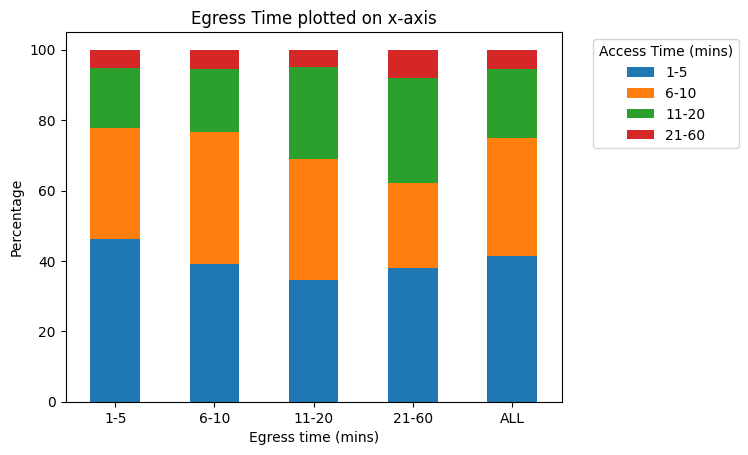

In [57]:
crosstab=pd.crosstab(df["EGRESS_TIME_B"],df["ACCESS_TIME_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Egress time (mins)')
plt.ylabel('Percentage')
plt.title("Egress Time plotted on x-axis")
plt.xticks([0,1,2,3,4],['1-5','6-10','11-20','21-60','ALL'])
plt.legend(['1-5','6-10','11-20','21-60'])
plt.legend(title='Access Time (mins)',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

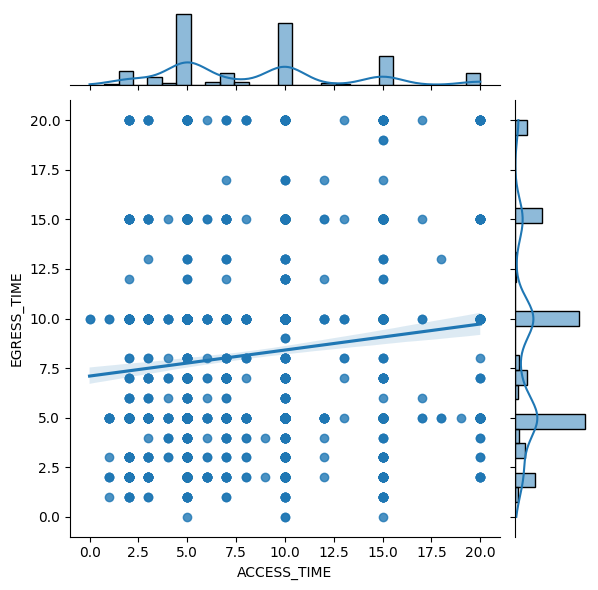

In [58]:
df1=df.loc[(df['ACCESS_TIME']<=20) & (df['EGRESS_TIME']<=20)]
# sns.regplot(data=df1,x='ACCESS_TIME',y='EGRESS_TIME',robust=True)
sns.jointplot(data=df1,x='ACCESS_TIME',y='EGRESS_TIME',kind='reg')

When access time is less than 20 minutes and egress time is greater than 20 

In [59]:

df1=df.loc[(df['ACCESS_TIME']<20) ]
df1=df1.loc[(df1['RENT_BICYCLE']!=4) & (df1['RENT_BICYCLE']!=3)]
# sns.histplot(data=df1,x='RENT_BICYCLE',stat='percent')
fig=px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only","Both"]})
fig.show()

When egress time is less than 20 minutes, commuter use bicycle only for access trip

<AxesSubplot: xlabel='RENT_BICYCLE', ylabel='Percent'>

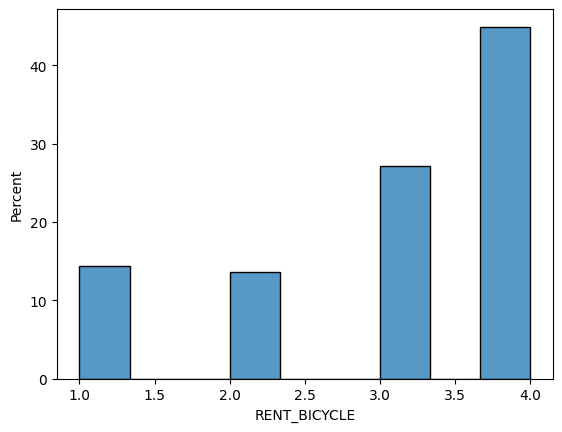

In [60]:
df1=df.loc[(df['ACCESS_TIME']>=20) & (df['EGRESS_TIME']<20) ]
sns.histplot(data=df1,x='RENT_BICYCLE',stat='percent')

ACCESS_TIME_B    1-5   6-10  11-20  21-60
EGRESS_TIME_B                            
1-5            47.40  32.29  16.15   4.17
6-10           33.33  40.78  21.96   3.92
11-20          26.32  32.89  36.84   3.95
21-60          20.69  31.03  31.03  17.24
All            35.35  35.83  24.20   4.62


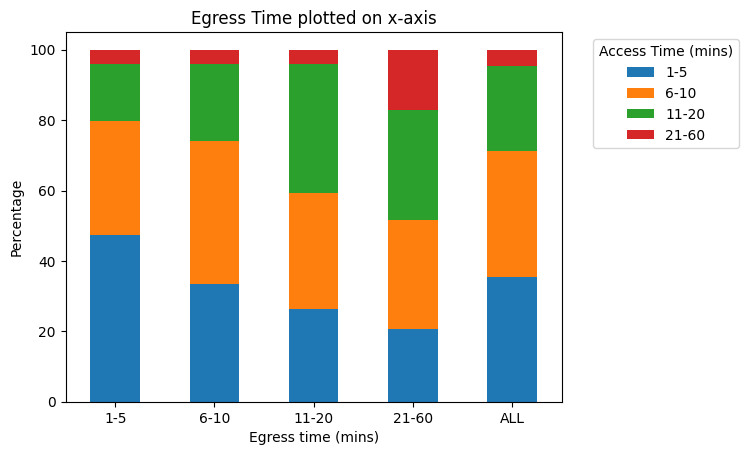

In [61]:
df1=df[df['RENT_BICYCLE']==3]
crosstab=pd.crosstab(df1["EGRESS_TIME_B"],df1["ACCESS_TIME_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Egress time (mins)')
plt.ylabel('Percentage')
plt.title("Egress Time plotted on x-axis")
plt.xticks([0,1,2,3,4],['1-5','6-10','11-20','21-60','ALL'])
plt.legend(['1-5','6-10','11-20','21-60'])
plt.legend(title='Access Time (mins)',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

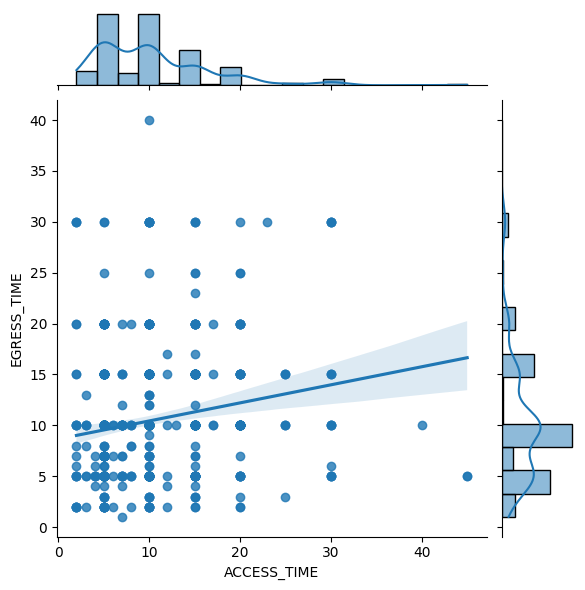

In [62]:
df1=df[df['RENT_BICYCLE']==3]
df1=df1.loc[(df1['ACCESS_TIME']<60) & (df1['EGRESS_TIME']<60)]
sns.jointplot(data=df1,x='ACCESS_TIME',y='EGRESS_TIME',kind='reg')

Less access and egress times?? still willing to use bicycle or both? Is it because of access/egress modes?

In [63]:
df1=df[df['RENT_BICYCLE']==3]
df1=df1.loc[(df1['ACCESS_TIME']<=20) & (df1['EGRESS_TIME']<=20)]
print(df1['ACCESS_M'].value_counts())
print(df1['EGRESS_M'].value_counts())


1     384
3      80
5      54
8      27
6      10
7       8
4       5
2       5
9       1
12      1
Name: ACCESS_M, dtype: int64
1     439
5      62
3      24
8      20
7      13
6       7
4       3
2       2
10      2
9       2
0       1
Name: EGRESS_M, dtype: int64


Modelling

In [64]:
df['USE']=0
mapper={1:1,2:1,3:1,4:0}
df['USE']=df['RENT_BICYCLE'].map(mapper)
df['USE'].value_counts()

0    1299
1    1194
Name: USE, dtype: int64

In [65]:
px.histogram(df,x='AGE_C',color='USE',title='Distribution of Age',barnorm='percent')